In [1]:
import cv2
from tqdm.auto import tqdm
from matplotlib import pyplot as plt

In [6]:
movie_id = "O8GmphpBbco"
video = cv2.VideoCapture(f'../video/{movie_id}.mp4')

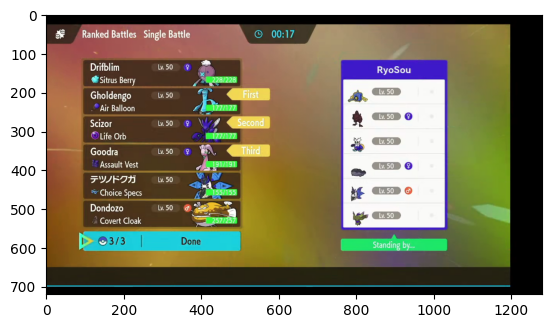

In [182]:
video.set(cv2.CAP_PROP_POS_FRAMES, 65000-1)
ret, frame = video.read()
plt.imshow(frame)
plt.show()

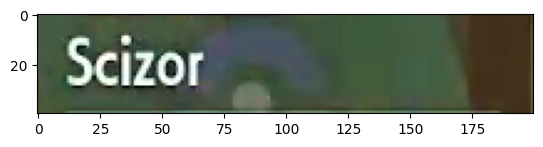

True

In [178]:
# pokemon_name
video.set(cv2.CAP_PROP_POS_FRAMES, 75300-1)
ret, frame = video.read()
plt.imshow(frame[575:615, 50:250])
plt.show()

cv2.imwrite("../template_images/labeled_pokemon_name_window_templates/ハッサム_英語.png", frame[575:615, 50:250])

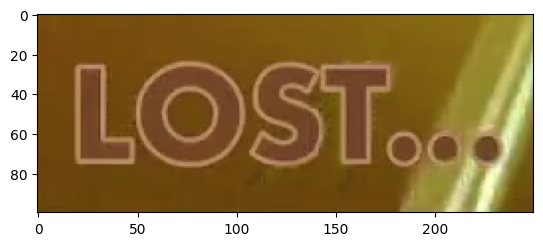

In [66]:
# win, lose を切り取る
video.set(cv2.CAP_PROP_POS_FRAMES, 16730-1)
ret, frame = video.read()
plt.imshow(frame[600:700, 250:500])
plt.show()

# cv2.imwrite("../template_images/general_templates/win.png", frame[600:700, 250:500])

In [122]:
standing_by_template = cv2.imread('templates/standing_by.png')
gray_standing_by_template = cv2.cvtColor(standing_by_template, cv2.COLOR_RGB2GRAY)

level_50_template = cv2.imread('templates/level_50.png')
gray_level_50_template = cv2.cvtColor(level_50_template, cv2.COLOR_RGB2GRAY)

standing_by_frames = []
level_50_frames = []
for i in tqdm(range(int(video.get(cv2.CAP_PROP_FRAME_COUNT)))):
    ret, frame = video.read()
    if ret:
        # standing_by
        gray_standing_by_area = cv2.cvtColor(frame[575:610, 160:435], cv2.COLOR_RGB2GRAY)
        result = cv2.matchTemplate(gray_standing_by_area, gray_standing_by_template, cv2.TM_CCOEFF_NORMED)
        threshold = 0.8
        if cv2.minMaxLoc(result)[1] >= threshold:
            standing_by_frames.append(i)
        
        # level_50
        gray_level_50_area = cv2.cvtColor(frame[55:80, 980:1040], cv2.COLOR_RGB2GRAY)
        result = cv2.matchTemplate(gray_level_50_area, gray_level_50_template, cv2.TM_CCOEFF_NORMED)
        threshold = 0.8
        if cv2.minMaxLoc(result)[1] >= threshold:
            level_50_frames.append(i)
        
    else:
        continue

  0%|          | 0/104018 [00:00<?, ?it/s]

In [123]:
len(standing_by_frames)

1030

In [124]:
len(level_50_frames)

18950

In [125]:
# フレームを連続区間で分割する
standing_by_frame_results = []
temp = []
for i in range(len(standing_by_frames)):
    temp.append(standing_by_frames[i])
    if i < len(standing_by_frames)-1 and standing_by_frames[i+1] - standing_by_frames[i] > 100:
        standing_by_frame_results.append(temp)
        temp = []
standing_by_frame_results.append(temp)

level_50_frame_results = []
temp = []
for i in range(len(level_50_frames)):
    temp.append(level_50_frames[i])
    if i < len(level_50_frames)-1 and level_50_frames[i+1] - level_50_frames[i] > 100:
        level_50_frame_results.append(temp)
        temp = []
level_50_frame_results.append(temp)

In [126]:
len(standing_by_frame_results)

5

In [127]:
len(level_50_frame_results)

60

In [86]:
# ポケモンの位置を切り取る
def get_opponent_pokemons(video, target_frame):
    video.set(cv2.CAP_PROP_POS_FRAMES, target_frame-1)
    res, frame = video.read()

    opponent_pokemon_1 = frame[170:230, 770:840]
    opponent_pokemon_2 = frame[230:295, 770:840]
    opponent_pokemon_3 = frame[295:360, 770:840]
    opponent_pokemon_4 = frame[360:425, 770:840]
    opponent_pokemon_5 = frame[425:485, 770:840]
    opponent_pokemon_6 = frame[485:550, 770:840]
    opponent_pokemons = [
        opponent_pokemon_1,
        opponent_pokemon_2,
        opponent_pokemon_3,
        opponent_pokemon_4,
        opponent_pokemon_5,
        opponent_pokemon_6
    ]
    return opponent_pokemons

# ポケモンの名前を切り取る
def get_opponent_pokemon_name(video, target_frame):
    video.set(cv2.CAP_PROP_POS_FRAMES, target_frame-1)
    res, frame = video.read()

    pokemon_name_window = frame[80:120, 950:1150]
    return pokemon_name_window

In [128]:
opponent_pokemons_list = []
for i, frames in enumerate(standing_by_frame_results):
    target_frame = frames[-10]
    opponent_pokemons = get_opponent_pokemons(video, target_frame)
    opponent_pokemons_list.append(opponent_pokemons)
    for k, op in enumerate(opponent_pokemons):
        # 検出したポケモンたちを保存する
        cv2.imwrite(f"pokemon_templates/{movie_id}_{i}_{k}.png", op)

In [129]:
for i, frames in enumerate(level_50_frame_results):
    target_frame = frames[-10]
    opponent_pokemon_name_window = get_opponent_pokemon_name(video, target_frame)
    cv2.imwrite(f"pokemon_name_window_templates/{movie_id}_{i}.png", opponent_pokemon_name_window)